<a href="https://colab.research.google.com/github/Z3r4t05/SVM-Assignment-MAI/blob/main/SVM_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline   
# uploaded = files.upload() # for local upload
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Data input**

In [ ]:
# load the csv file
diabetes_data = pd.read_csv('https://raw.githubusercontent.com/Z3r4t05/SVM-Assignment-MAI/main/data.csv') 
# use the line of code below if uploading from local computer
# diabetes_data = pd.read_csv('/data.csv') 

#**Data Overview** 

## **Understanding the data**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content The datasets consists of several medical predictor variables and one target variable, Outcome. Columns are following :-

+ Pregnancies: Number of times pregnant

+ Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

+ BloodPressure: Diastolic blood pressure (mm Hg)

+ SkinThickness: Triceps skin fold thickness (mm)

+ Insulin: 2-Hour serum insulin (mu U/ml)

+ BMI: Body mass index (weight in kg/(height in m)²)

+ DiabetesPedigreeFunction: Diabetes pedigree function

+ Age: Age in years

+ Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## Data shape

In [ ]:
diabetes_data.shape

(768, 9)

## Data info

In [ ]:

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Take a peek at the data

In [ ]:
# Top 5 data set
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Last 5 data set
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# A row for example
display(diabetes_data.iloc[2])

Pregnancies                   8.000
Glucose                     183.000
BloodPressure                64.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          23.300
DiabetesPedigreeFunction      0.672
Age                          32.000
Outcome                       1.000
Name: 2, dtype: float64

## Data summary

In [ ]:
# Five Point summary of the data 
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Missing data values

In [ ]:
# To check the missing values in the dataset
diabetes_data.isnull().values.any()

False

We see that there aren't any null values in the dataset. This doesn't make sense. It seems very likely that zero values encode missing data.We replace 0 by NaN values to count the missing values.

In [ ]:
# Replace 0 values to NaN
d = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
d.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [ ]:
# Find the number of Missing values
d.isnull().sum()[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

## Handling the missing values by replacing NaN to median

In [ ]:
# Replace NaN to median
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].median(),inplace=True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].median(),inplace=True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(),inplace=True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(),inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(),inplace=True)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Data Visualization

## Outcome

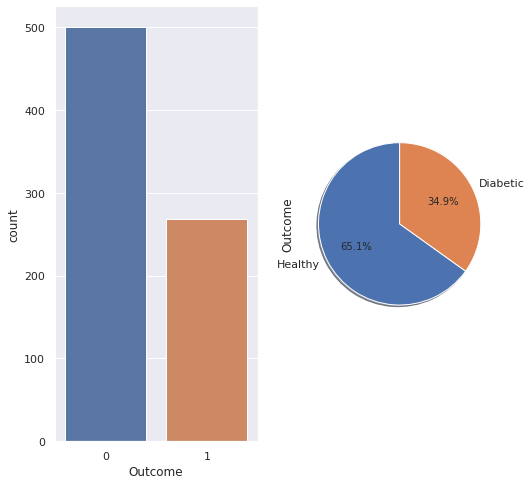

In [ ]:
# Analysing the Outcome

# To get the number of diabetic and Healthy person
diabetes_data.groupby('Outcome').size()

# countplot----Plot the frequency of the Outcome
fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observations in each categorical bin using bars
sns.countplot(diabetes_data['Outcome'],ax=ax1[0])

#Find the % of diabetic and Healthy person
labels = 'Healthy', 'Diabetic'
diabetes_data.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

We see that the data is bias to non-diabetic patients.

## Histogram

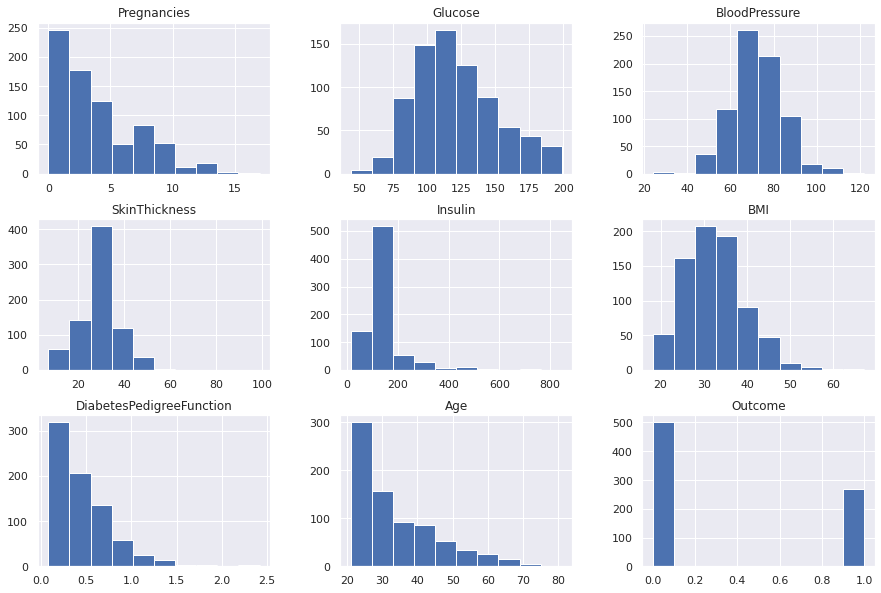

In [ ]:
# Histogram

diabetes_data.hist(figsize=(15,10));

## Distplot

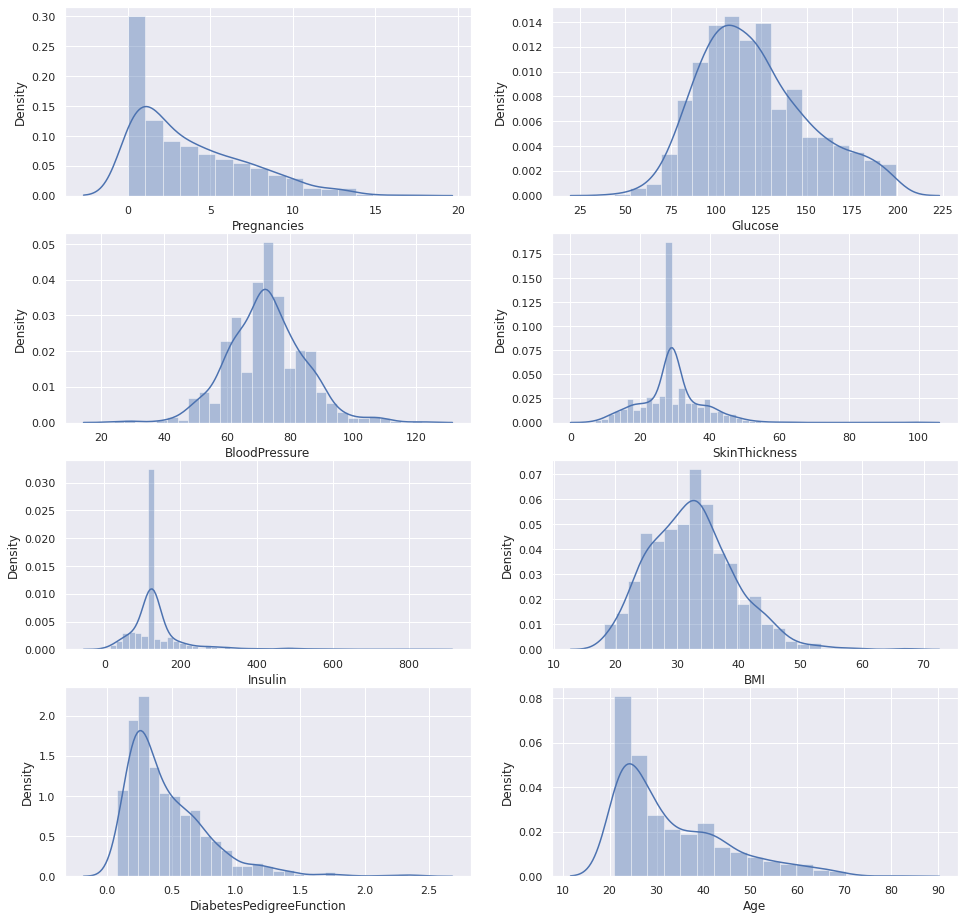

In [62]:
# Distplot

fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(diabetes_data['Pregnancies'],ax=ax2[0][0]);
sns.distplot(diabetes_data['Glucose'],ax=ax2[0][1]);
sns.distplot(diabetes_data['BloodPressure'],ax=ax2[1][0]);
sns.distplot(diabetes_data['SkinThickness'],ax=ax2[1][1]);
sns.distplot(diabetes_data['Insulin'],ax=ax2[2][0]);
sns.distplot(diabetes_data['BMI'],ax=ax2[2][1]);
sns.distplot(diabetes_data['DiabetesPedigreeFunction'],ax=ax2[3][0]);
sns.distplot(diabetes_data['Age'],ax=ax2[3][1]);

The plots show that Glucose, Blood Pressure, BMI are normally distributed. 
While Pregnancies, Insulin, Age, DiabetesPedigreeFunction are rightly skewed.

## Boxplot

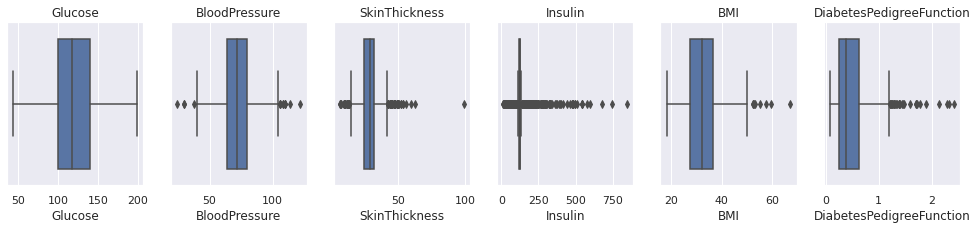

In [63]:
# Boxplot

fig=plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data3=plt.subplot(1,7,i,title=diabetes_data.columns[i])
    sns.boxplot(diabetes_data[diabetes_data.columns[i]]);

We have replaced the '0' value to median of the parameters. The plot shows outliers present in the dataset.

BloodPressure, SkinThickness, Insulin, BMI have outliers. It is clearly visible in the boxplots.

## Pair plot

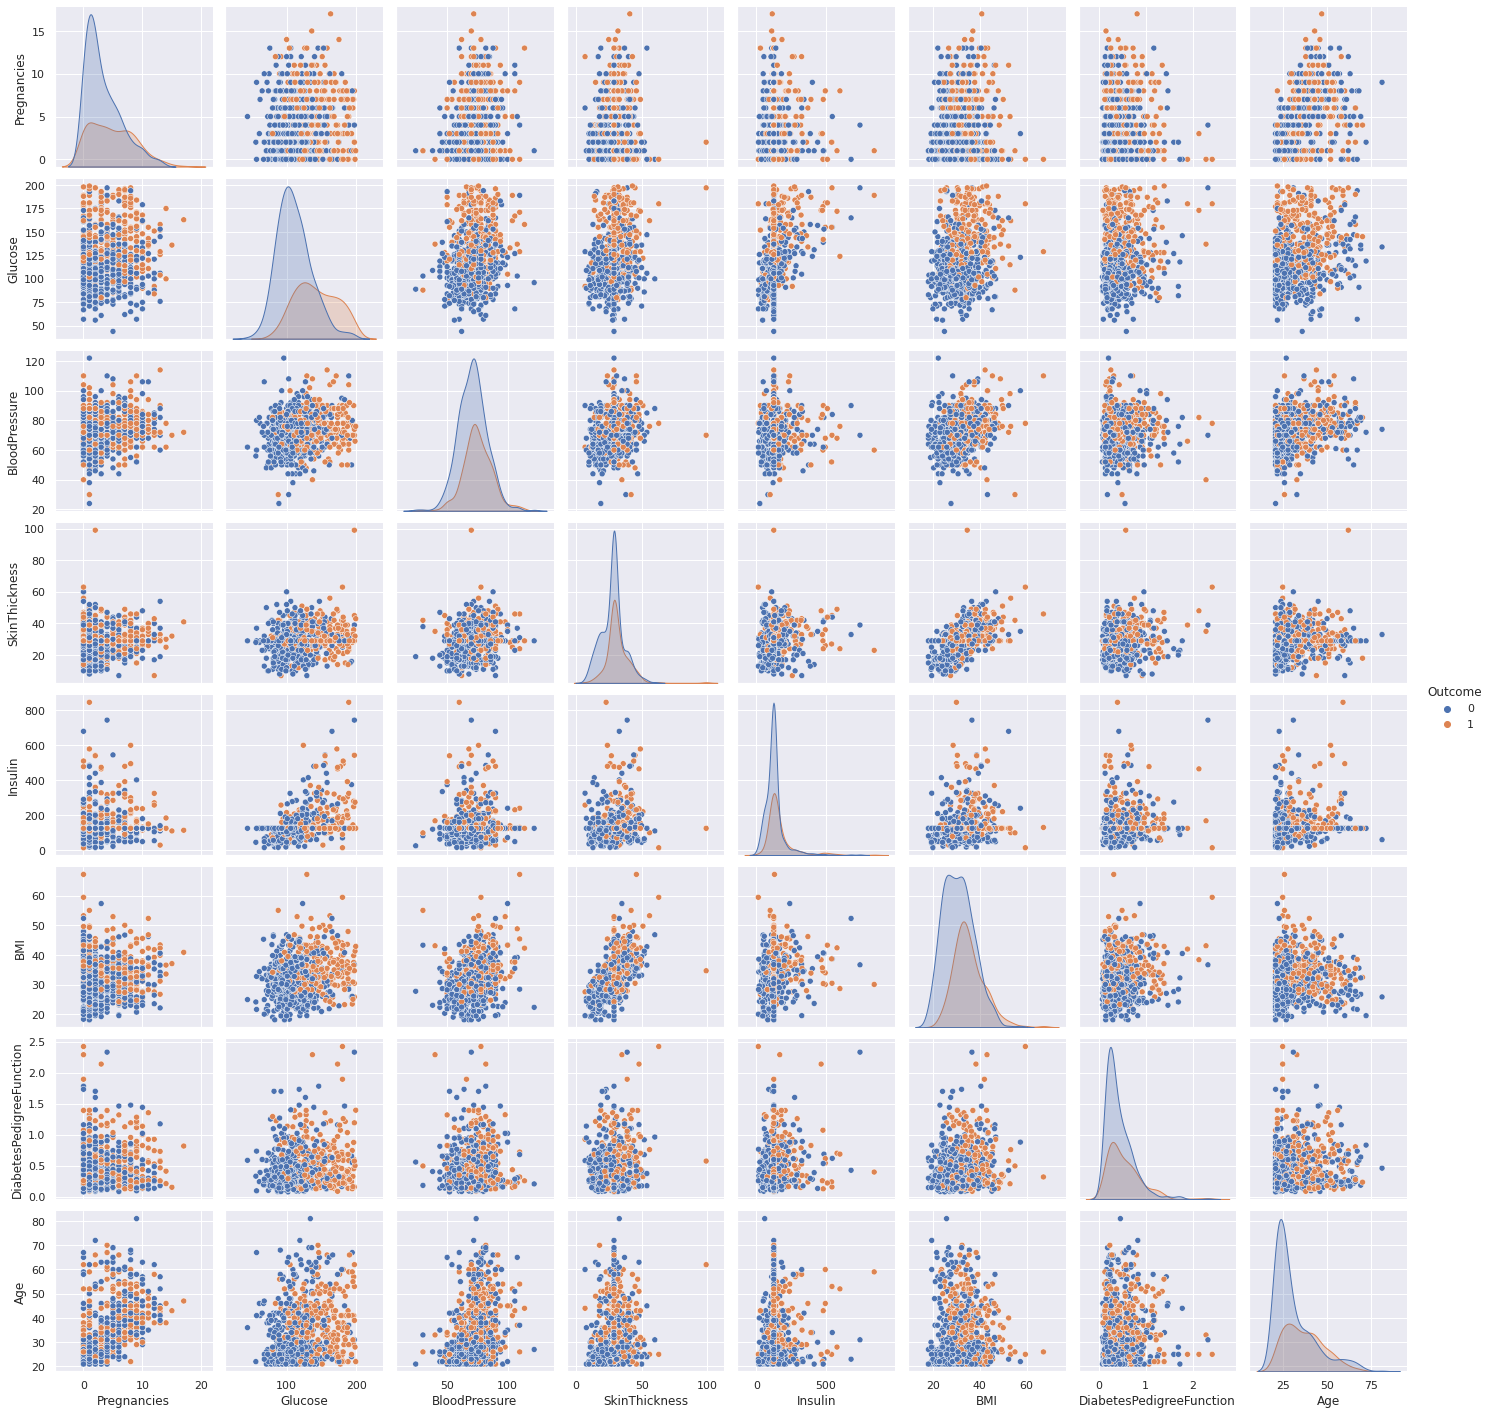

In [64]:
# pairplot--Multiple relationship of scatterplot
sns.pairplot(diabetes_data,hue='Outcome', diag_kind = 'kde');

The plot shows that there is some relationship between parameters.

## Correlation heatmap

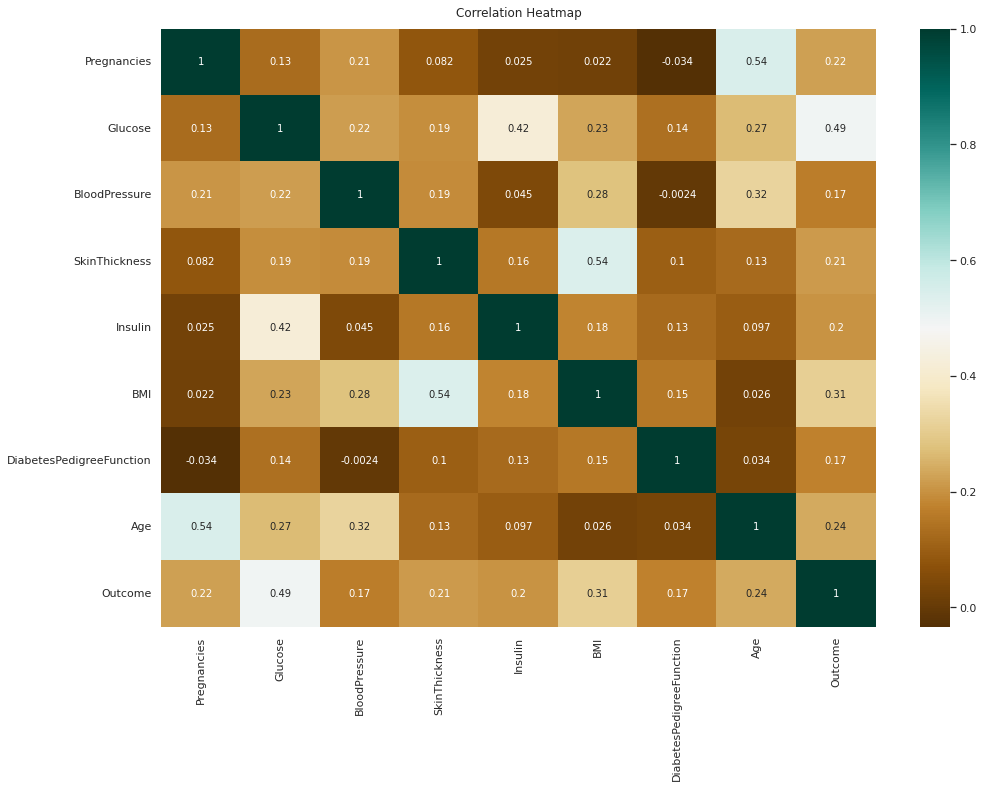

In [90]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 11))
heatmap = sns.heatmap(diabetes_data.corr(), annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The correlation plot shows the relation between the parameters.

+ Glucose,Age,BMI and Pregnancies are the most correlated parameters with the Outcome.
+ Insulin and DiabetesPedigreeFunction have little correlation with the outcome.
+ BloodPressure and SkinThickness have tiny correlation with the outcome.
+ There is a little correlation between Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose

# Implementation

## Classifier SVM


The SVM will learn using the [Stochastic Gradient Descent algorithm (SGD)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent). SGD minimizes a function by following the gradients of the cost function. 
### Hinge Loss function
We define the loss function to calculate the prediction error. The hinge loss function in our SVM:
$$l(x,y)=max\,\{0,\: 1-yf(x)\}$$
In which, $l$ is the loss function, $x$ is the sample, $y$ is the true label, $f(x)=\left< w,x \right>+b$ is the predicted label.

In other words: $$l(x,y)=\left\{\begin{matrix}
0, & \mathrm{if\mathrm{}}\;  yf(x) \geq 1  \\
1-yf(x), & \mathrm{else \mathrm{}} \\
\end{matrix}\right.$$

So if $y$ and $f(x)$ are signed values $(+1,-1)$:
+ The loss if $0$ if $yf(x)$ is postive, which indicates that both values have the same sign.
+ The loss is $1-yf(x)$ if $yf(x)$ is negative

### Lagrangian Duality

asdf



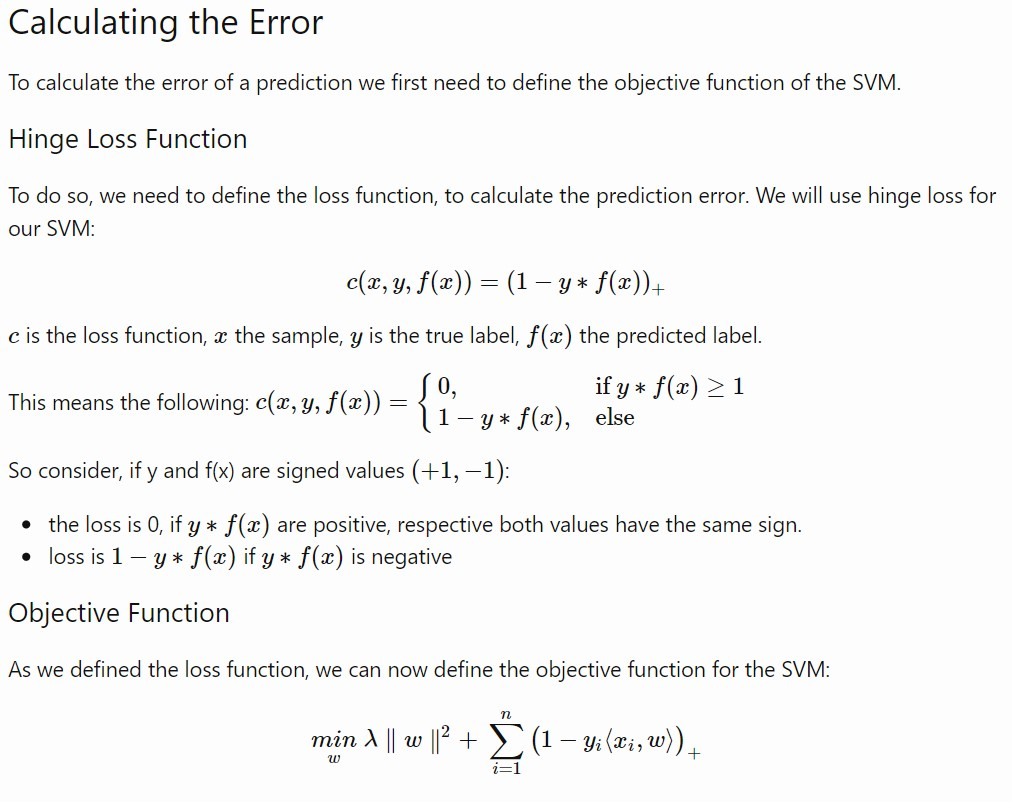


The first term is a regularizer, the heart of the SVM, the second term the loss. The regularizer balances between margin maximization and loss.

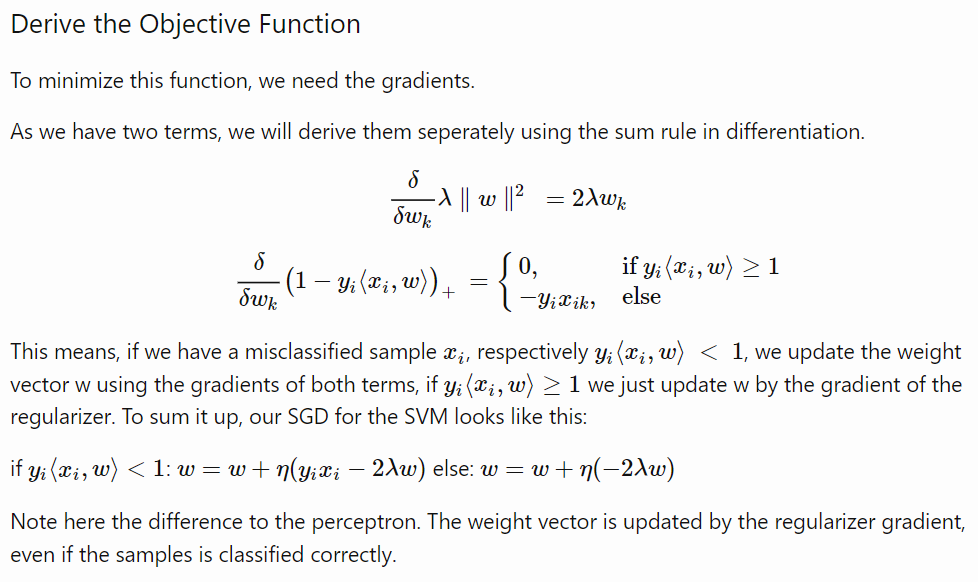

In [ ]:
class SVM_classifier():
    
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        """Initialize the classifier with the given parameters.

        Args:
            learning_rate (_type_): _description_
            no_of_iterations (_type_): _description_
            lambda_parameter (_type_): _description_
        """
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

    def fit(self, X, Y):
        """Fit the classifier to the given dataset.

        Args:
            X (_type_): _description_
            Y (_type_): _description_
        """
        # m  --> number of Data points --> number of rows
        # n  --> number of input features --> number of columns
        self.m, self.n = X.shape
        
        # initiating the weight value and bias value
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # implementing Gradient Descent algorithm for Optimization
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        """Update the weights and bias using the gradient descent algorithm."""
        # label encoding
        y_label = np.where(self.Y <= 0, -1, 1)

        # gradients [dw  db]
        for index, x_i in enumerate(self.X):
            condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
            if (condition == True):
                dw = 2 * self.lambda_parameter * self.w
                db = 0
            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
                db = y_label[index]
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

    def predict(self, X):
        """Predict the label for the given input value.

        Args:
            X (_type_): _description_

        Returns:
            _type_: _description_
        """
        print('w = ', self.w)
        print('b = ', self.b)
        output = np.dot(X, self.w) - self.b
        predicted_labels = np.sign(output)
        y_hat = np.where(predicted_labels <= -1, 0, 1)
        for d, sample in enumerate(features):
        # Plot the negative samples
            if d < 2:
                plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
            # Plot the positive samples
            else:
                plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

        # Add our test samples

        plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
        plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

        # Print the hyperplane calculated 
        x2=[self.w[0],self.w[1],-self.w[1],self.w[0]]
        x3=[self.w[0],self.w[1],self.w[1],-self.w[0]]

        x2x3 =np.array([x2,x3])
        X,Y,U,V = zip(*x2x3)
        ax = plt.gca()
        ax.quiver(X,Y,U,V,scale=1, color='blue')
        return y_hat

## Separating the features and labels

In [ ]:
features = diabetes_data.drop(columns='Outcome', axis=1)
target = diabetes_data['Outcome']
print(features)
print(target)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


## Standardizing the data

In [67]:
# Call StandardScaler to standardize the features
scaler = StandardScaler()
print(scaler.fit(features))
StandardScaler(copy=True, with_mean=True, with_std=True)
standardized_data = scaler.transform(features)
print(standardized_data)
print(standardized_data.shape)


StandardScaler()
[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]
(768, 8)


In [68]:
features = standardized_data
target = diabetes_data['Outcome']
print(features)
print(target)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Train test split

In [69]:
# splitting the dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=2)
print(features.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## Training model

In [70]:
classifier = SVM_classifier(
    learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)
classifier.fit(X_train, Y_train)

## Evaluating 

### On training dataset

w =  [ 0.34761856  0.9034932  -0.06363612  0.00099854 -0.02969277  0.40217602
  0.23208584  0.01562954]
b =  0.6210000000000004
Accuracy score on training data =  0.7752442996742671


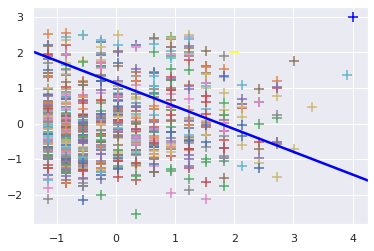

In [71]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score on training data = ', training_data_accuracy)

## On the test set

w =  [ 0.34761856  0.9034932  -0.06363612  0.00099854 -0.02969277  0.40217602
  0.23208584  0.01562954]
b =  0.6210000000000004
Accuracy score on test data =  0.7467532467532467


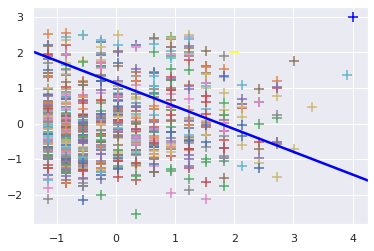

In [72]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score on test data = ', test_data_accuracy)

## Predict label for a test data

[[ 0.3429808   1.45779063 -0.03198993 -1.15054099  0.39765315 -0.96863623
   0.34768723  1.51108316]]
w =  [ 0.34761856  0.9034932  -0.06363612  0.00099854 -0.02969277  0.40217602
  0.23208584  0.01562954]
b =  0.6210000000000004
[1]
The Person is diabetic


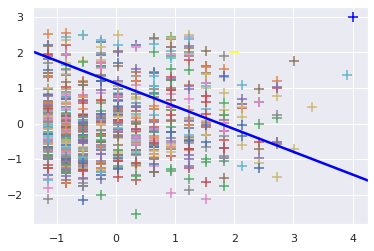

In [73]:
# Predicting the labels for the test data 
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the arra
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The Person is diabetic')

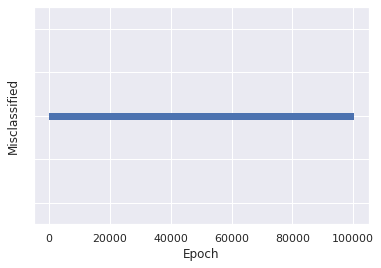

In [74]:
def svm_sgd_plot(X, Y):

    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000
    errors = []


    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)

    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()

svm_sgd_plot(features, target)